In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Generate toy-spectra

In [2]:
k = np.arange(900, 1800, 5)

In [7]:
a=[]

for i in range(10):
    a.append( norm.pdf( k, loc=1000+np.random.rand()*25, scale=10+np.random.rand()*10)*(1+np.random.rand()*0.5 ) )

A = pd.DataFrame(np.column_stack((k, *a)))

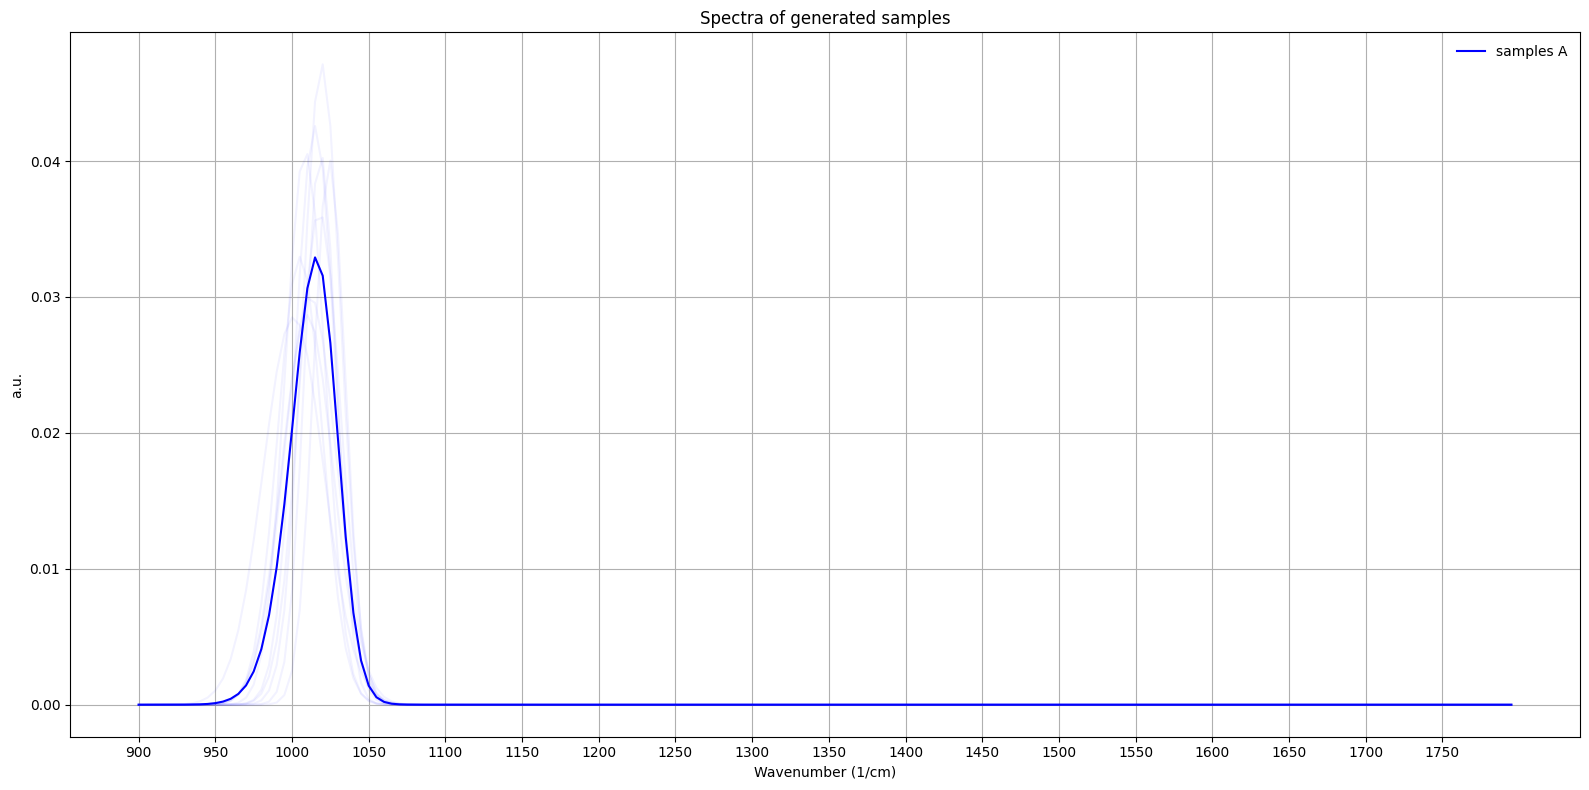

In [23]:
fig, ax = plt.subplots(figsize=[16, 8])
sample_measurement = []


A_plot = pd.melt(A, [0])
for sample, measurement in A_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="blue")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="blue", label="samples A", legend=True
)



ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()